In [1]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from datetime import datetime


nltk.download("rslp")


[nltk_data] Downloading package rslp to /home/marvin-
[nltk_data]     linux/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
def stemming(texto: str) -> str:
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    palavras = [stemmer.stem(palavra) for palavra in texto.split()]
    return " ".join(palavras)


def remover_stop_words(texto: str, more_words: list = []) -> str:
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(more_words)
    stopwords.extend(
        [
            "rt",
            "http",
            "https",
            "com",
            "co",
            "org",
            "www",
            "...",
            "q",
            "d",
            "p",
            "ai",
            "pq",
            "vc",
            "nao",
            "n",
        ]
    )
    texto = " ".join(list(filter(lambda x: x not in stopwords, texto.split())))
    return texto


def formatar_texto(texto: str) -> str:
    texto = (
        re.sub(r"(http\S+)|(@\w+)", "", texto)  # remove links, usuários
        .replace(".", "")
        .replace(";", "")
        .replace("-", "")
        .replace(":", "")
        .replace(")", "")
    )

    texto = re.sub(r"(  +)", " ", texto)  # remove espaços duplos
    texto = texto.lower().strip()

    return texto


def datetime_to_period(hour):
    if hour >= 0 and hour < 6:
        return "overnight"
    elif hour >= 6 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 18:
        return "afternoon"
    elif hour >= 18 and hour < 24:
        return "night"


def datetime_to_hour(temp_str: str) -> int:
    datetime_object = datetime.strptime(temp_str, "%a %b %d %H:%M:%S %z %Y")
    return datetime_object.hour


In [3]:
df = pd.read_csv("../data/raw/NoThemeTweets.csv").drop(
    columns=["id", "query_used"], axis=1  # remove colunas desnecessárias
)

df.sample(30)


,tweet_text,tweet_date,sentiment
590470,Já não aguento mais ficar sem celular :(,Fri Sep 21 00:07:42 +0000 2018,Negativo
701968,Então é nós até o fim @luanzin_7 :) 🙏😉👏 https:...,Wed Sep 26 13:16:39 +0000 2018,Positivo
687999,@eunwendy Que um beijinho na testa pra aliviar...,Wed Sep 26 03:19:20 +0000 2018,Negativo
302466,@Diogomont4 você nem fala mais comigo :(,Tue Sep 04 21:25:33 +0000 2018,Negativo
566451,"Casem, tenham filhos e um cãozinho :)",Wed Sep 19 17:56:20 +0000 2018,Positivo
712808,@Nabor_Escobar Eles são bem legais :)))),Fri Sep 28 01:08:12 +0000 2018,Positivo
460192,wonho :(((,Fri Sep 14 10:51:58 +0000 2018,Negativo
472978,queria ir no absinthe amanhã mas eu não sei co...,Sat Sep 15 00:25:25 +0000 2018,Negativo
289666,:( meu deus eu to muito mal https://t.co/f3JFx...,Tue Sep 04 02:50:30 +0000 2018,Negativo
249447,@Haru_rpg ah eu nao uso kakao :( poxa,Wed Aug 29 23:07:12 +0000 2018,Negativo


In [4]:
df.drop_duplicates(["tweet_text"], inplace=True)  # remove textos duplicados
df["tweet_text"] = df["tweet_text"].apply(
    lambda tweet: formatar_texto(texto=tweet)
)  # formata texto do dataframe

df.loc[350538, "tweet_text"]


'isto foi tão à toa, fds ((( ❤'

In [5]:
df = df.assign(
    number_words=df.tweet_text.apply(lambda x: len(x.split(" "))),
)  # adiciona coluna com número de palavras
formated_df = df.drop(
    df[df.number_words < 5].index
)  # remove tweets com menos de 5 palavras

print(df.shape)
formated_df


(776753, 4)


,tweet_text,tweet_date,sentiment,number_words
1,o meu like eu já dei na época,Tue Aug 21 04:32:55 +0000 2018,Positivo,8
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,10
3,d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveitar p",Tue Aug 21 04:32:21 +0000 2018,Positivo,10
5,"eu entendi, mas isso foi mais porque eu pensei...",Tue Aug 21 04:32:03 +0000 2018,Positivo,13
...,...,...,...,...
785809,acordar 8 horas é tão bom,Fri Oct 12 11:10:01 +0000 2018,Positivo,6
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,28
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,14
785812,foi como a tua lealdade,Fri Oct 12 11:11:24 +0000 2018,Positivo,5


In [6]:
print(formated_df.describe())

formated_df.sample(5)


        number_words
count  632562.000000
mean       14.460129
std         9.894103
min         5.000000
25%         7.000000
50%        11.000000
75%        18.000000
max        85.000000


,tweet_text,tweet_date,sentiment,number_words
442946,liga dos campeões chegando e aqui em casa ñ pe...,Thu Sep 13 01:26:53 +0000 2018,Negativo,14
473040,e os boys como estão ? — não estão (,Sat Sep 15 00:36:00 +0000 2018,Negativo,10
706284,"nada, só deu tudo errado",Wed Sep 26 23:00:23 +0000 2018,Positivo,5
50605,qual é o seu animal espiritual? — tigre branco...,Fri Aug 17 00:19:04 +0000 2018,Positivo,12
96809,é a lei da vida (,Mon Aug 20 11:55:28 +0000 2018,Negativo,6


<AxesSubplot:>

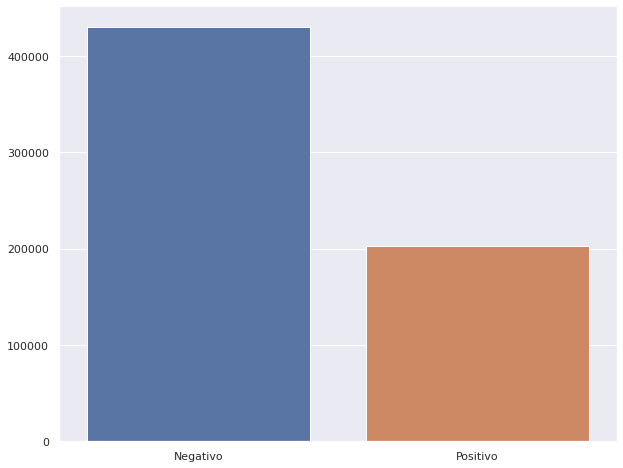

In [7]:
sentiments = formated_df["sentiment"].value_counts()
sns.set(rc={"figure.figsize": (10, 8)})
sns.barplot(x=sentiments.index, y=sentiments.values)


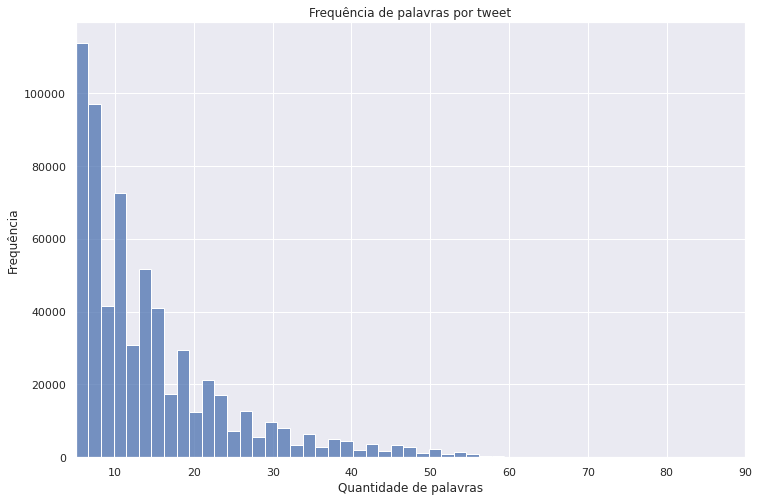

In [8]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.histplot(data=formated_df, x="number_words", bins=50)

plt.xlabel("Quantidade de palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras por tweet")
plt.xlim([5, 90])
plt.show()


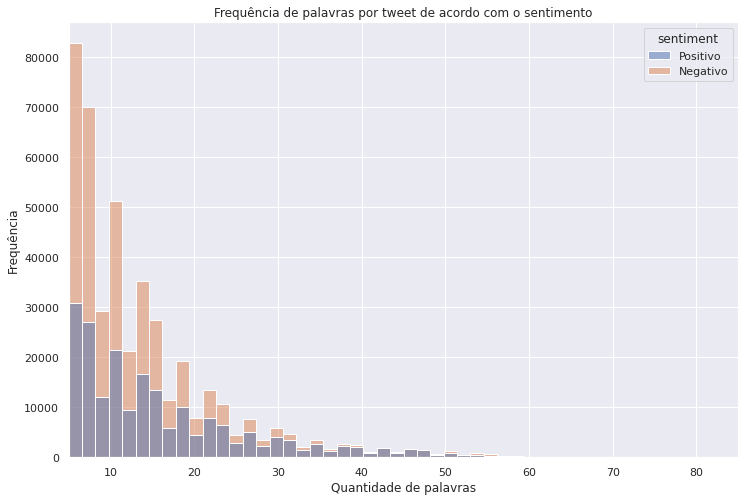

In [9]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.histplot(data=formated_df, x="number_words", hue="sentiment", bins=50)
plt.xlabel("Quantidade de palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras por tweet de acordo com o sentimento")
plt.xlim(5, 85)
plt.show()


In [10]:
df_positivo = formated_df.query("sentiment == 'Positivo'")
df_negativo = formated_df.query("sentiment == 'Negativo'")

positive_text = " ".join(df_positivo.tweet_text)
negative_text = " ".join(df_negativo.tweet_text)

positive_filter = remover_stop_words(positive_text)
negative_filter = remover_stop_words(negative_text)


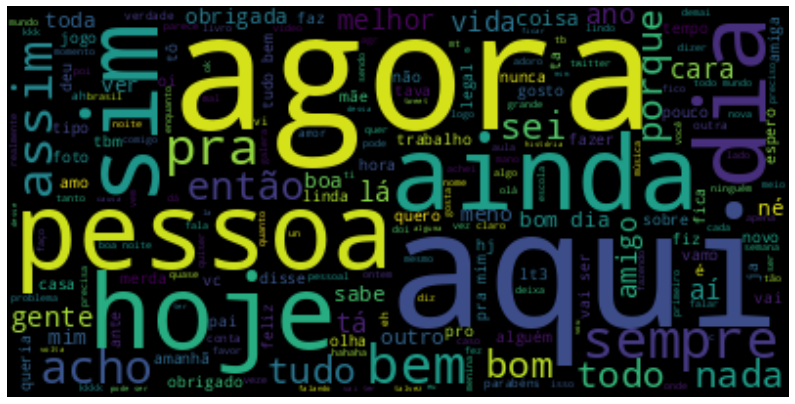

In [11]:
# Generate a word cloud image
wordcloud = WordCloud().generate(positive_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


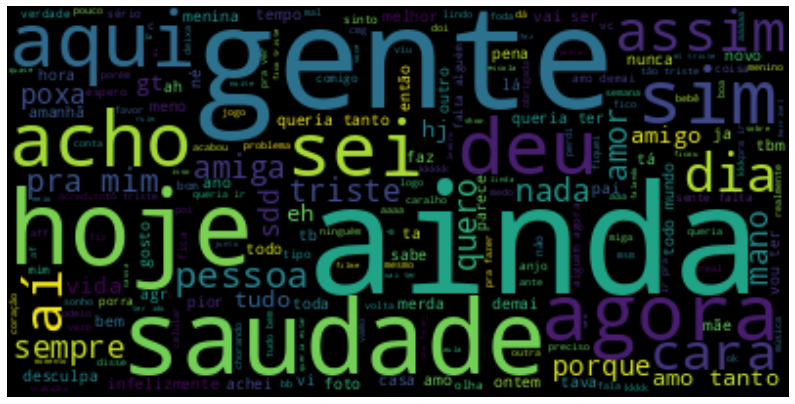

In [12]:
wordcloud = WordCloud().generate(negative_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


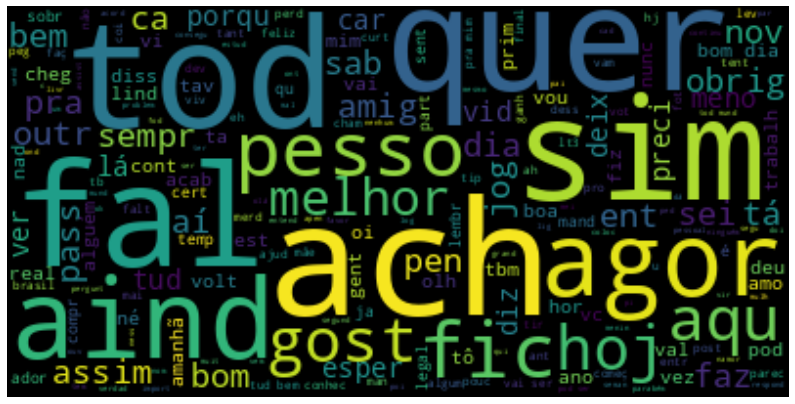

In [13]:
wordcloud = WordCloud().generate(stemming(positive_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


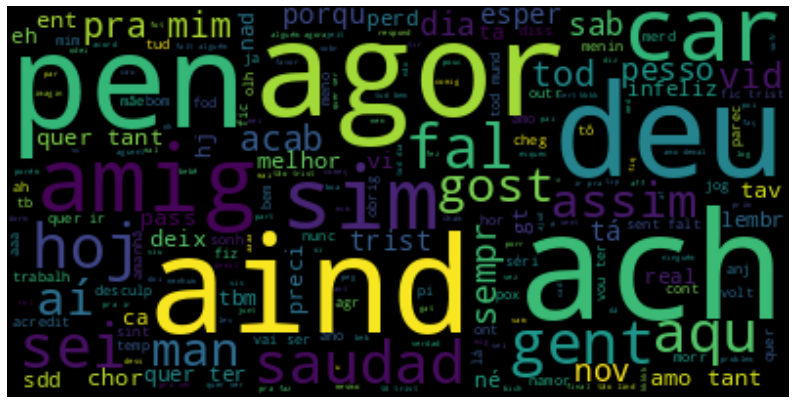

In [14]:
wordcloud = WordCloud().generate(stemming(negative_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [21]:
formated_df = formated_df.assign(day_period=formated_df.tweet_date.apply(lambda x: datetime_to_period(datetime_to_hour(x))))

formated_df


,tweet_text,tweet_date,sentiment,number_words,day_period
1,o meu like eu já dei na época,Tue Aug 21 04:32:55 +0000 2018,Positivo,8,overnight
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,10,overnight
3,d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,overnight
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveitar p",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,overnight
5,"eu entendi, mas isso foi mais porque eu pensei...",Tue Aug 21 04:32:03 +0000 2018,Positivo,13,overnight
...,...,...,...,...,...
785809,acordar 8 horas é tão bom,Fri Oct 12 11:10:01 +0000 2018,Positivo,6,morning
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,28,morning
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,14,morning
785812,foi como a tua lealdade,Fri Oct 12 11:11:24 +0000 2018,Positivo,5,morning


Text(0.5, 1.0, 'Frequência de tweets por período do dia')

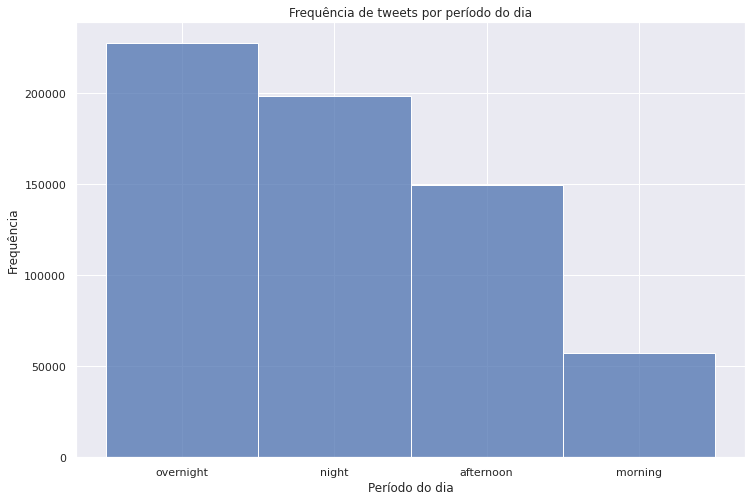

In [22]:
sns.histplot(data=formated_df, x="day_period", bins=5)
plt.xlabel("Período do dia")
plt.ylabel("Frequência")
plt.title("Frequência de tweets por período do dia")


Text(0.5, 1.0, 'Frequência de tweets por período de acordo com o sentimento')

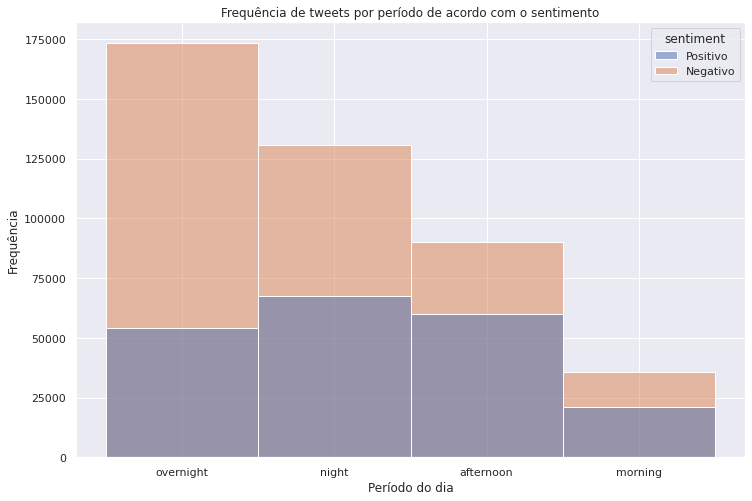

In [23]:
sns.histplot(data=formated_df, x="day_period", hue="sentiment", bins=5)
plt.xlabel("Período do dia")
plt.ylabel("Frequência")
plt.title("Frequência de tweets por período de acordo com o sentimento")
